In [1]:
# read in all the modules we'll use
# included by default
import numpy as np
import matplotlib.pyplot as plt

# added to this kernel
# pip install : SpeechRecognition
import speech_recognition as sr
# pip install: soundfile
import soundfile as sf


we can use microphone like mic= sr.Microphone but. in this example. we use audio file as source that perviously recorded. as a mad word 

In [2]:
### create a fucntion to speed this process up

# our function takes in a file path & uses the default API key to 
# recognize what's in it. 

# IMPORTANT NOTE: You don't want to do this too many  times because the 
# default API key is rate limited & you'll hit it pretty quick
def recognize_speech_goog_default(file_path):
    # use the audio file as the audio source
    r = sr.Recognizer()
    with sr.AudioFile(file_path, ) as source:
        audio = r.record(source)  # read the entire audio file

    # recognize speech using Google Speech Recognition
    try:
        # for testing purposes, we're just using the default API key
        # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
        # instead of `r.recognize_google(audio)`
        print("Google Speech Recognition thinksteach you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

# use function to recognize the same file
recognize_speech_goog_default("../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/bed/1001.wav")

Google Speech Recognition thinksteach you said mad


Text(0.5,0,'Time [sec]')

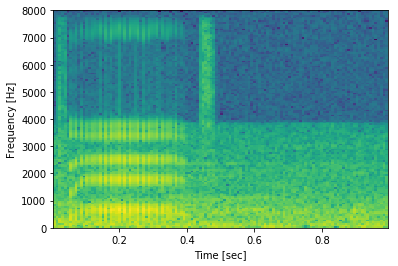

In [6]:
### Visualizing a spectrogram

# load in the data & samplerate
data, samplerate = sf.read("../input/synthetic-speech-commands-dataset/augmented_dataset_verynoisy/augmented_dataset_verynoisy/bed/1001.wav")

# plot a spectrogram
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

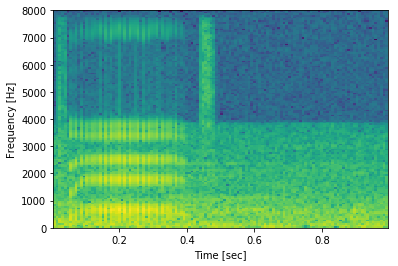

In [5]:
# Now let's write a function to produce a spectrogram
# that looks like this with just the file path

# What do we do first?
def viz_spectrogram(file_path):
    # load in the data & samplerate
    data, samplerate = sf.read(file_path)

    # plot a spectrogram
    Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

    # add axis labels
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
viz_spectrogram("../input/synthetic-speech-commands-dataset/augmented_dataset_verynoisy/augmented_dataset_verynoisy/bed/1001.wav")

In [4]:
## Now, write a function that will make it easier for you to use that code in the future
def concat_strings(string1, string2):
    new_string = string1 + " " + string2
    return new_string

concat_strings("adsfs","asfdsaf")

'adsfs asfdsaf'

In [3]:
# import packages we'll need
import pandas as pd

# create a dataframe with random numbers in it
dataframe_random = pd.DataFrame(np.random.randint(low=0, high=10, size=(5,5)),
                    columns=['a', 'b', 'c', 'd', 'e'])

# Function to subtract the median from the mean for each column in a dataframe
# (a very simple measure of skew)
def simple_skew(df):
    means = df.mean(axis=None, skipna=None, level=None, numeric_only=None)
    medians = df.median(axis=None, skipna=None, level=None, numeric_only=None)

    return means - medians

# see if it works
simple_skew(dataframe_random)

a   -0.2
b    1.2
c    1.4
d   -1.2
e    0.2
dtype: float64